
\text{Given:} \\
P(\text{Pass}) = 0.9, \, P(\text{Fail}) = 0.1, \\
P(\text{Quick}|\text{Pass}) = 0.6, \, P(\text{Quick}|\text{Fail}) = 0.3 \\

\text{By the law of total probability:} \\
P(\text{Quick}) = P(\text{Quick}|\text{Pass})P(\text{Pass}) + P(\text{Quick}|\text{Fail})P(\text{Fail}) \\
P(\text{Quick}) = 0.6 \times 0.9 + 0.3 \times 0.1 = 0.57 \\

\text{Using Bayes' theorem:} \\
P(\text{Pass}|\text{Quick}) = \frac{P(\text{Quick}|\text{Pass}) \cdot P(\text{Pass})}{P(\text{Quick})} \\
P(\text{Pass}|\text{Quick}) = \frac{0.6 \times 0.9}{0.57} = 0.947 \\

\text{Conclusion:} \\
\text{The proportion of students who answer the question quickly and will pass the class is } 94.7\%.


\textbf{Multinomial Likelihood:} \\
p(x | \theta, n) = \frac{n!}{x_1! x_2! \cdots x_k!} \prod_{i=1}^k \theta_i^{x_i} \\

\textbf{Dirichlet Prior:} \\
p(\theta | \alpha) = \frac{1}{B(\alpha)} \prod_{i=1}^k \theta_i^{\alpha_i - 1}, \quad B(\alpha) = \frac{\prod_{i=1}^k \Gamma(\alpha_i)}{\Gamma\left(\sum_{i=1}^k 

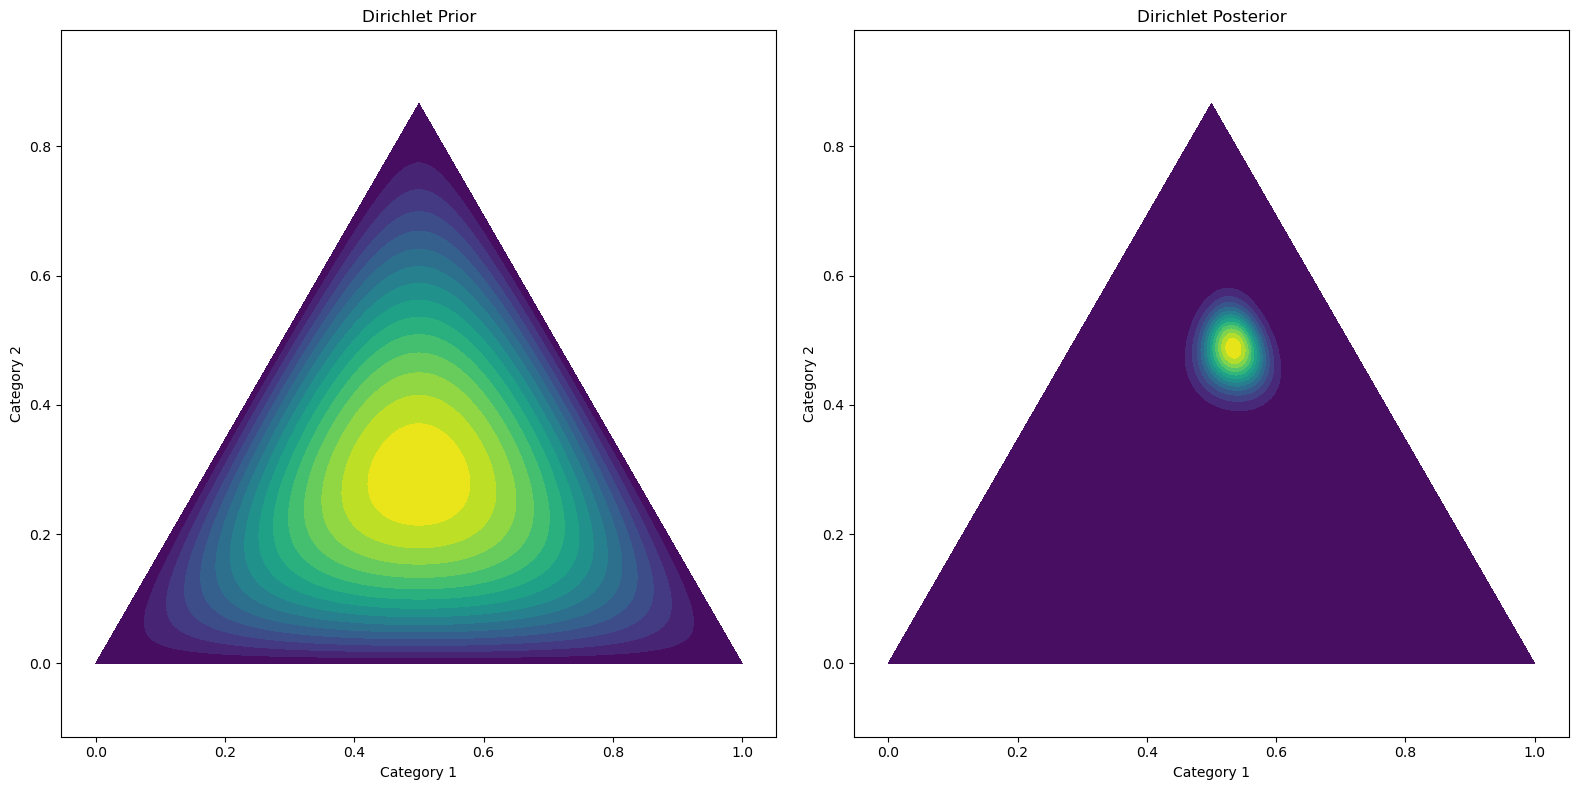

In [4]:
#Q1
latex_representation = r"""
\text{Given:} \\
P(\text{Pass}) = 0.9, \, P(\text{Fail}) = 0.1, \\
P(\text{Quick}|\text{Pass}) = 0.6, \, P(\text{Quick}|\text{Fail}) = 0.3 \\

\text{By the law of total probability:} \\
P(\text{Quick}) = P(\text{Quick}|\text{Pass})P(\text{Pass}) + P(\text{Quick}|\text{Fail})P(\text{Fail}) \\
P(\text{Quick}) = 0.6 \times 0.9 + 0.3 \times 0.1 = 0.57 \\

\text{Using Bayes' theorem:} \\
P(\text{Pass}|\text{Quick}) = \frac{P(\text{Quick}|\text{Pass}) \cdot P(\text{Pass})}{P(\text{Quick})} \\
P(\text{Pass}|\text{Quick}) = \frac{0.6 \times 0.9}{0.57} = 0.947 \\

\text{Conclusion:} \\
\text{The proportion of students who answer the question quickly and will pass the class is } 94.7\%.
"""

print(latex_representation)



#Q2
latex_representation = r"""
\textbf{Multinomial Likelihood:} \\
p(x | \theta, n) = \frac{n!}{x_1! x_2! \cdots x_k!} \prod_{i=1}^k \theta_i^{x_i} \\

\textbf{Dirichlet Prior:} \\
p(\theta | \alpha) = \frac{1}{B(\alpha)} \prod_{i=1}^k \theta_i^{\alpha_i - 1}, \quad B(\alpha) = \frac{\prod_{i=1}^k \Gamma(\alpha_i)}{\Gamma\left(\sum_{i=1}^k \alpha_i\right)} \\

\textbf{Posterior:} \\
p(\theta | x, n, \alpha) \propto p(x | \theta, n) \cdot p(\theta | \alpha) = \prod_{i=1}^k \theta_i^{x_i + \alpha_i - 1} \\

\textbf{Posterior Parameters:} \\
\alpha_i^{\text{posterior}} = \alpha_i + x_i \quad \text{for } i = 1, 2, \ldots, k \\

\textbf{Posterior Distribution:} \\
p(\theta | x, n, \alpha) = \text{Dirichlet}(\alpha_1 + x_1, \alpha_2 + x_2, \ldots, \alpha_k + x_k)
"""

print(latex_representation)

#Q3
import numpy as np
from scipy.stats import multinomial, dirichlet
import matplotlib.pyplot as plt

# 创建三元网格
def ternary_grid(resolution=200):
    points = []
    for i in range(resolution + 1):
        for j in range(resolution + 1 - i):
            k = resolution - i - j
            points.append([i / resolution, j / resolution, k / resolution])
    return np.array(points)

# 转换三元点到二维坐标
def ternary_to_2d(points):
    x = points[:, 0] + points[:, 1] / 2
    y = np.sqrt(3) / 2 * points[:, 1]
    return x, y

# 生成网格和样本
n = 100
p = [0.3, 0.5, 0.2]
sample = multinomial.rvs(n=n, p=p, size=1)[0]

alpha_prior = np.array([2, 2, 2])
alpha_posterior = alpha_prior + sample

grid = ternary_grid(resolution=100)
x, y = ternary_to_2d(grid)

prior_density = dirichlet.pdf(grid.T, alpha_prior)
posterior_density = dirichlet.pdf(grid.T, alpha_posterior)

# 绘制三角形分布
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# 绘制先验分布
axs[0].tricontourf(x, y, prior_density, levels=15, cmap='viridis')
axs[0].set_title("Dirichlet Prior")
axs[0].set_xlabel("Category 1")
axs[0].set_ylabel("Category 2")
axs[0].axis("equal")

# 绘制后验分布
axs[1].tricontourf(x, y, posterior_density, levels=15, cmap='viridis')
axs[1].set_title("Dirichlet Posterior")
axs[1].set_xlabel("Category 1")
axs[1].set_ylabel("Category 2")
axs[1].axis("equal")

plt.tight_layout()
plt.show()